<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday October 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Joshua Achorn

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Bottom](#bot)

---

In [33]:
from scipy import stats
from random import randint
import random
from scipy.special import binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as mat
from collections import Counter
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: Rubber Ducky Race

Every year, the Aspen Valley Rotary Club hosts a [rubber ducky race](https://www.aspenrotary.org/page/the-ducky-derby). Each Rubber Ducky is stamped with a number, tickets are sold  and if your ducky makes it to the end of the course first, you win. Exact Rules follow:

1. The Rotary Club sells "Duck Adoption" papers. Only Ducks that have been adopted start the race, so there must always be a winner.
2. The ducks are dumped into a river and race to a finish line. The adoptive parent of the first duck across the line wins. The standard prize is 15,000 dollars.
3. Before the start of the duck race, the Rotary Club randomly draws a number of special ducks. For every 3,333 ducks that start the race, 1 special duck is drawn.
4. If a special duck wins the race the prize is increased from 15,000 dollars to 1,000,000 dollars.

**Assume that all ducks are equally likely to win the ducky race.**

**Part A:**
Given that 9999 ducks start the race and you purchase 1 duck, calculate the probability by hand that your duck is selected as a special ducky.

if I purchase a duck and there are 9,999 ducks all together, and for every 3,333 ducks, 1 special duck is drawn, that means they will choose 3 ducks out of the 9,999 ducks that race. the probability of my duck being picked first is $P(1st) = \frac{1}{9999}$, the probability of my duck being picked second is $P(2nd) = \frac{1}{9998}$, and the probability of my duck being picked the third time is $P(3rd) =\frac{1}{9997}$. the probability of either of these happening is 


$p(1) = \frac{1}{9999}= 0.00010001$

$p(2|\bar{1}) = \frac{1}{9998}*\frac{9998}{9999} = 0.00009999999$

$p(3|\bar{2}) = \frac{1}{9997}*\frac{1}{9998}*\frac{9998}{9999}$




$P(1st)+P(2nd)+P(3rd) = \frac{1}{9999}+\frac{1}{9998}+\frac{1}{9997} = 0.00030006 = 0.03\%$ 

**Part B:** Calculate the probability that the rotary club pays out the million dollar prize.

out of 9999 ducks racing, 3 of those ducks will be special ducks, so again, the probability of a special duck winning the race is  $P(M) =\frac{1}{3333}$

**Part C:** Calculate the probability that your duck is both picked as a special duck and wins the race.

The Probability of my duck being picked AND winning is equivilant to the probability of my duck being picked, GIVEN it won, times the probability of my duck winning.

$P(D\cap W) = P(D|W)P(W)$

My duck being picked and winning are independant of each other so we can also write is ash such

$P(D\cap W) = P(D)P(W)$

the probability of my duck being picked is 0.03% and the probability of me winning is 1/9999

$P(D\cap W) = \frac{1}{3333} * \frac{1}{9999} = 0.000000030009002300590157043312273544036405660657990756058601 = 0.000003\%$

**Part D:** Calculate the expected payout for the Rotary Club for a 9999 duck race. 

regular duck winning 15,000
special duck winning 1,000,000

P(R) = 9996/9999 = 99.96% chance of paying out 15,000 
P(S) = 3/9999 = 0.03% chance of paying out 1,000,000




**Part E:** The Rotary Club takes out an insurance policy on having to pay the 1,000,000 dollar prize. They pay $50 per duck race to the insurance company. From your answer above, is this worth it? Explain. Is there any number of ducks that make the insurance policy a good deal? If it is not worth it, what's a reason the the Rotary Club might buy the policy anyways? 

the number of ducks doesn't matter because it will always be around a 0.02-0.03% chance of a special duck winning. 

Even though there is only, at most, a 0.03% chance of a special duck winning, I think it is always worth paying insurance for something that has a probability of occuring, no matter how unlikely it is to occur. 

**Part F:** Write a python function that simulates a single duck race. It should use the api below and the class written for you. DO NOT CHANGE THE API OR THE ENUMERATED CLASS. The function should take the number of ducks that start the race in as a parameter, and return a tuple of the duck's number that won, and the type of winner that duck was. 

[E.g. (1522, <Types_Of_Winner.REGULAR: 0>) ] 

The duck numbers start at 1 and go until the number passed in (Eg. For 500 ducks, the ducks are numbered 1 to 500. No Duck is numbered 0).

In [34]:
from enum import Enum
#Dont change this. You should return a tuple of (int, Type_Of_Winner) in the function below. 
#The type of winner should be from this class. The int should represent the duck number of the winning duck.
#If you want more info about Enumerated Types in python: https://docs.python.org/3/library/enum.html
class types_of_winner(Enum):
    REGULAR = 0
    SPECIAL = 1

#don't change this api. We will use a set of unit tests to test this. 
#This uses a default parameter. If you are unfamiliar with default parameters: 
#https://www.geeksforgeeks.org/default-arguments-in-python/ 
#Don't change the default parameter.
def rubber_ducky_race(number_of_ducks=3333):
    
    #YOUR IMPLEMENTATION HERE
    #Change the below to simulate a duck race.
    numSpecialDucks = mat.floor(number_of_ducks/3333)
#     print(numSpecialDucks)
    winning_duck_number = np.random.choice(number_of_ducks)
    type_of_winner = np.random.choice([types_of_winner.REGULAR,types_of_winner.SPECIAL], 
                                      p=[(number_of_ducks-numSpecialDucks)/number_of_ducks,numSpecialDucks/number_of_ducks])
    
    #you can change the variable names, but must return tuple of type (int, Types_Of_Winner)
    return (winning_duck_number, type_of_winner)
  
rubber_ducky_race()

(1835, <types_of_winner.REGULAR: 0>)

**Part G:** Write a python function that takes in a number of duck races (num_Duck_Races) and a number of ducks per race (num_Ducks_Per_Race). The function should run the function you wrote in part F by passing the number of ducks to the function from part F. It should run the function from part F num_Duck_Races times, and record all the results. It then should calculate the amount of money the rotary club paid out in each race and return a list of the rotary club's payouts (integer values of dollars paid out). Don't change the API as we will be auto grading this.

In [35]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    #IMPLEMENTATION HERE
    payoutList = []
    for i in range(num_Duck_Races):
        winner = rubber_ducky_race(num_Ducks_Per_Race)
#         print(winner[1])
        
#         if regular winner
        if winner[1] == types_of_winner.REGULAR:
            payoutList.append(15000)
        else: payoutList.append(1000000)
    #CHANGE RETURN VALUE TO BE LIST OF PAYOUTS FROM YOUR CODE IMPLEMENTED IN THIS FUNCTION
    return payoutList
# run_Simulation_Duck_Race(1111,3333)

**Part H:** Run the simulation function you made in part G 50 times for 1111 duck races each with 3333 ducks per race. Calculate the mean of each list of payouts returned by your function from part F and plot the mean payout values on a histogram. We recommend using the default bins argument here (don't pass it in). Make sure to make your histogram legible, label the plot, and label the x and the y axes (with their units). Do this all in one cell and run the cell a few times and see what different histograms are generated from the simulations. When you find one with three distinct "bars" leave it in the output of the cell. Explain why this histogram makes sense. Your answer here should talk about what each distinct "bar" in the histogram represents, the probabiity that the rotary club pays out the million dollar prize, and the number of races in each simulation. 

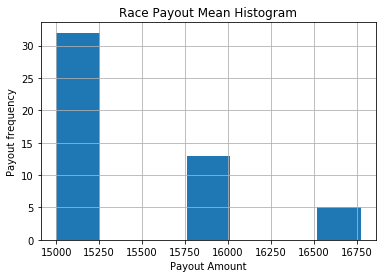

In [36]:
payouts = np.array([])

for i in range(50):
    raceList = run_Simulation_Duck_Race(1111,3333)
    mean = sum(raceList)/len(raceList)
#     print(mean)
    payouts =np.append(payouts, mean)
# print(payouts)

plt.hist(payouts, bins='auto')
plt.title("histogram")
plt.xlabel("Payout Amount")
plt.ylabel("Payout frequency")
plt.grid()
plt.title("Race Payout Mean Histogram")
plt.show()


In the graph above, with 1111 duck races in each of the 50 mean indeces, we have 55,550 races in total. in our leftmost bar in the graph, we have at least 43,329 races that were won by normal ducks, then we have some race means that were scewed by a win from a special duck. sow out of 1111 races we may have one special duck that changes the mean from 150,000 to something a little above 150,000 as we move over to the right of the graph we have a very small percentage of a mean of above 165,000 payouts which has an array of more than one win from a special duck. 


**Part I:** Pick a lucky number in between 1 and 7000 and run your function from part F 25000 times with 7,000 ducks. Capture all the results and find the number of times your duck won! Was your duck ever a winner or even a special Million Dollar Winner?

In [37]:
luckyNum = 9
wins = 0
specialWins=0
for i in range(25000):
    
    race = rubber_ducky_race(7000)
#     print(race)
#     if my duck wins
    if race[0] == luckyNum:
        wins += 1
#         if my duck special wins
        if race[1] == types_of_winner.SPECIAL:
            specialwins += 1
print("wins:", wins, "Special wins:", specialWins)

wins: 1 Special wins: 0


After running my function so many times, I would win between 0-5 times but I never really won with a special duck

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2: Tax Fraud

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, we will decide whether this dataset is fraudulent. 



**Part A**:  Read in the data and create a variable that holds only the character of each data point.

In [38]:
dfFig = pd.read_csv("tax.txt")
# print(df)
dfFig = dfFig.replace('\B[0-9]', '', regex=True)
dfFig = dfFig.replace('.\t', '', regex=True)
dfFig = dfFig.astype(float)
# str.extract(r'\B[0-9]*' , expand=False)
# print(dfFig)

**Part B**: Create a histogram of the data that also plots or overlays the suggested non-fradulent density $f(x)$ as well as the density of the discrete uniform over the same support.

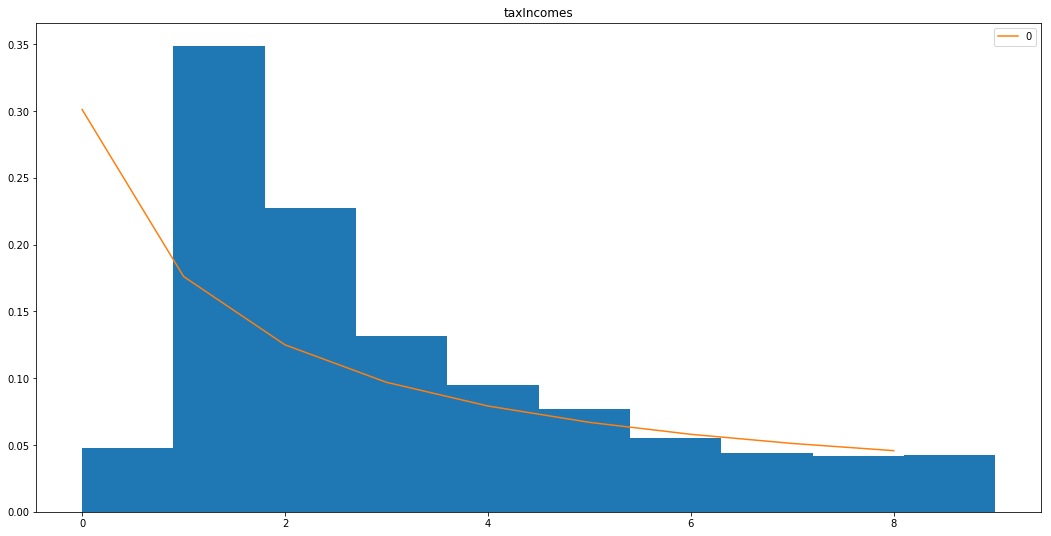

In [39]:
array = []
for i in range(1,10):
    array.append(np.log10((i+1)/i))
ndf = pd.DataFrame(array)

fig,ax = plt.subplots(figsize=(18,9))

dfFig.hist(ax=ax, density=True)
ndf.plot(ax=ax)

**Part C**: Does it appear as those the data is fraudulent, not fraudulent, or too hard to tell?  What kind of numerical measures could you use to support such a conclusion?

I would say it is non fraudulent. although the graph around x > 0 doesnt seem to match up with the overlay I would say its mostly uniform. If it was fraudulent I would expect a more consistent x measurements with each other almost making a horizontal bar of sorts. 

**Part D**: Create a new object that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  Repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

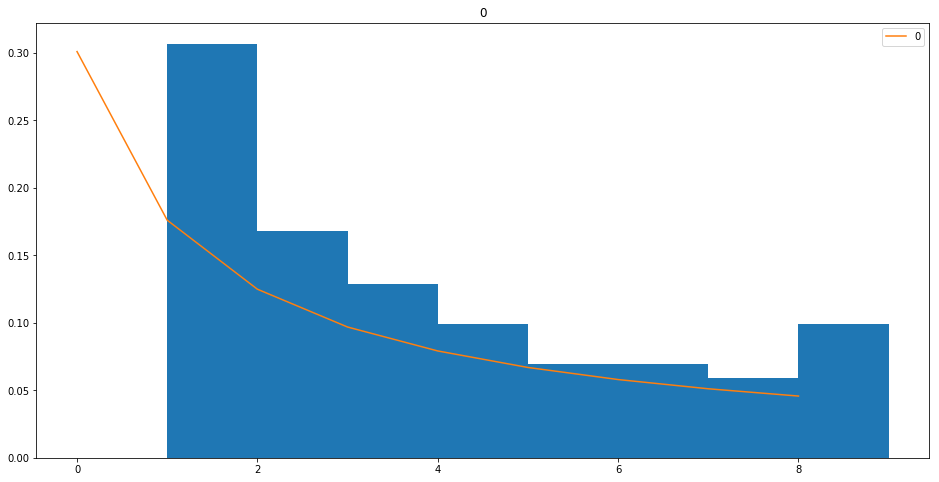

In [40]:
Array = np.array([])
for i in range(101):
    Array = np.append(Array, str(2**i))
    
dfArray = pd.DataFrame(Array)
dfArray = dfArray.replace('\B[0-9]', '', regex=True)
dfArray = dfArray.astype(float)

mybins = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(16,8))
dfArray.hist(ax=ax, density = True, bins = mybins)
ndf.plot(ax=ax)

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Poker

It's time to play poker.  (https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values) Assume that we are using a standard deck of cards without jokers (52 cards). For each round, you will be dealt 5 cards from the deck without replacement. There are several different types of hands that can be dealt; listed below are a few of interest: 

- Highcard (Simple value of the card. Lowest: 2 - Highest: Ace)
- Pair (Two cards with the same value)
- Two pair (Twice two cards with the same value)
- Three of a kind (Three cards with the same value)
- Straight (Sequence of 5 cards in increasing value, Ace can only follow K)
- Four of a kind (Four cards with the same value)
- Full house (Three of a kind and a pair)
- Flush (5 cards of the same suit)

**Part A**: What is the exact probability you get at least a Pair in your 5 cards? What is the probability of getting a Full House?  (Note that we're including pairs as a subset of a full house, here)

it will be easier to find out the probability of not getting a pair is $P(\bar{p}) = \frac{48}{51}\frac{44}{50}\frac{40}{49}\frac{36}{48} = 0.507$ 

$P(p) = 1 - P(\bar{p})$

$P(p) = 1 - 0.507$

$P(p) = 0.493$

**Part B**: Write a function `getCards()` to randomly generate 5 cards from the no-joker deck. This function should return an array of 5 cards.

In [41]:
class Card:
    pass

suit = ['heart','diamond','club','spade']
num = ['ace','2','3','4','5','6','7','8','9','10','jack','queen','king']

# randomCard = Card()
# randomCard.suit = random.choice(suit)
# randomCard.num = random.choice(num)


def getCards():
    fiveCards = []
    while len(fiveCards) < 5:
        randomCard = Card()
        isIn = False 
        randomCard.suit = random.choice(suit)
        randomCard.num = random.choice(num)
#         print("random card is the", randomCard.num , 'of' , randomCard.suit )
        
        #check if card is already in hand
        for i in fiveCards:
#             print("array card is the", i.num , 'of' , i.suit )
            if randomCard.num == i.num:
#                 print("same num")
#                 print(randomCard.num)
#                 print(i.num)
                if randomCard.suit == i.suit:
#                     print("same suit!")
#                     print(randomCard.suit)
#                     print(i.suit)
                    isIn = True
        if isIn == False:
            fiveCards.append(randomCard)
        isIn = False
    return fiveCards
cards = getCards()
for i in cards:
    print(" card is the", i.num , 'of' , i.suit )

 card is the 7 of diamond
 card is the 6 of club
 card is the 2 of club
 card is the 6 of spade
 card is the 2 of diamond


**Part C**: Run the `getCards()` simulation 10000 times, and store the result in an array named `card_array`.

In [42]:
# npCards = np.array([])
card_array = []
for i in range(1000):
#     npCards = np.append(npCards, getCards())
    card_array.append(getCards())
print(card_array[10])

[<__main__.Card object at 0x7fa5393052e8>, <__main__.Card object at 0x7fa539305518>, <__main__.Card object at 0x7fa539305390>, <__main__.Card object at 0x7fa539305048>, <__main__.Card object at 0x7fa5393055f8>]


**Part D**: Write a function `pair(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of have Pair? Does the result agree with your calculation in Part A?

In [43]:
def pair(card_array, num_sim):
    pairs = 0
    for fiveCards in card_array:  #for loop through five cards array
#         print(fiveCards)
        pair = False
        nums = []
        for card in fiveCards:   #for loop through five cards
            nums.append(card.num)    
#         print(nums)
        
        counts = Counter(nums)
#         print(counts)
        for i in counts:
             if counts[i] == 2:
                pair = True
        if pair == True:
#             print("found a pair")
            pairs += 1
        
        pair = False
    print(pairs)
    return(pairs/num_sim)
pair(card_array,1000)

472


0.472

**Part E:** Write a function `fullhouse(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of having a Full House? Does the result agree with your calculation in Part A?

In [44]:
def fullhouse(card_array, num_sim):
    fulls = 0
    for fiveCards in card_array:  #for loop through five cards array
#         print(fiveCards)
        three = False
        two = False
        nums = []
        for card in fiveCards:   #for loop through five cards
            nums.append(card.num)    
#         print(nums)
        
        counts = Counter(nums)
#         print(counts)
        for i in counts:
            if counts[i] == 3:
                three = True
            if counts[i] == 2: 
                two = True
            
                    
        if two == True and three == True:
            print("found a full house")
            print(counts)
            
            fulls += 1
        
        two = False
        three = False
    print(fulls)
    return(fulls/num_sim)
fullhouse(card_array,1000)

found a full house
Counter({'jack': 3, '3': 2})
found a full house
Counter({'10': 3, '3': 2})
found a full house
Counter({'10': 3, '6': 2})
3


0.003